In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from glob import glob
import statistics
import os
import pandas as pd

### CUB200

Incremental Accuracy

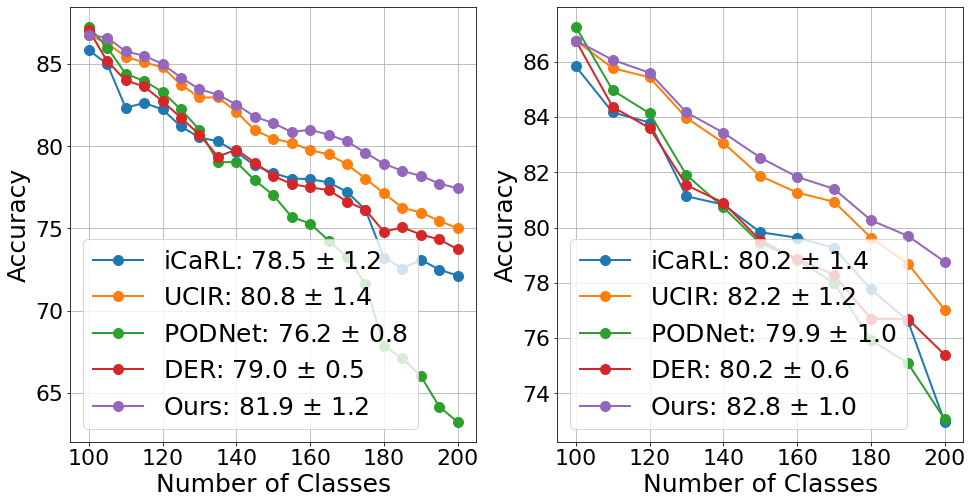

In [3]:
folder = f'results/pretrain'
exps = {
    5:
       {
        'iCaRL': f'{folder}/icarl/20220328_icarl_cub200_100steps5',
        'UCIR': f'{folder}/ucir/20220320_ucir_cnn_cub200_100steps5',
        'PODNet': f'{folder}/podnet/20220330_podnet_cnn_cub200_100steps5',
        'DER': f'{folder}/der/20220325_derE0_cub200_100steps5',
        'Ours': f'{folder}/ours/20220321_derE3_cub200_100steps5',
       },
    10:
       {
        'iCaRL': f'{folder}/icarl/20220327_icarl_cub200_100steps10',
        'UCIR': f'{folder}/ucir/20220319_ucir_cnn_cub200_100steps10',
        'PODNet': f'{folder}/podnet/20220327_podnet_cnn_cub200_100steps10',
        'DER': f'{folder}/der/20220331_derE0_cub200_100steps10',
        'Ours': f'{folder}/ours/20220319_derE3_cub200_100steps10',
       }       
      }

incs=[5,10]
row = min(len(incs),3)
plt.figure(figsize=(8*len(incs),8))
for j, inc in enumerate(incs):
    exp = exps[inc]
    plt.subplot(int(np.ceil(len(incs)//row)),row,j+1)

    avg_top1_total = {}
    cul_top1_total = {}
    count = {}
    for k in [0,1,2]:
        for e1, e2 in exp.items():
            file = f'{e2}/run_{k}_1993_.json'
            if not os.path.exists(file):
                continue
            result = json.load(open(file))

            top1_total = list(map(lambda x: 100 * x['accuracy']['total'], result['results']))
        
            if e1 in avg_top1_total:
                avg_top1_total[e1] += np.array(top1_total)
                cul_top1_total[e1].append(np.mean(top1_total))
                count[e1] += 1
            else:
                avg_top1_total[e1] = np.array(top1_total)
                cul_top1_total[e1] = [np.mean(top1_total)]
                count[e1] = 1
        
    for e1, e2 in avg_top1_total.items():
        top1_total = e2/count[e1]
        mean = statistics.mean(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else cul_top1_total[e1][0]
        std = statistics.stdev(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else 0
        xs = list(range(100,201,inc))
        plt.plot(xs, top1_total, marker='o', label=f'{e1}: {mean:.1f}' + r' $\pm$ ' + f'{std:.1f}', linewidth=2, markersize=10)

    # plt.plot(xs, test)

    plt.xlabel('Number of Classes', fontsize=25)
    plt.xticks(fontsize=22)
    plt.ylabel('Accuracy', fontsize=25)
    plt.yticks(fontsize=22)
#     plt.ylim(71,89)
#     plt.title(f'{inc} new classes per step', fontsize=25)
    plt.grid(True)
    plt.legend(prop={'size':25})
#     plt.tight_layout()
plt.show()


Forgetting

iCaRL [ 0.          0.94933333  4.56266667  2.58        3.10983333  3.86406667
  4.79438889  5.27752381  5.94920833  6.42562963  7.60813333  7.9870303
  8.03972222  8.23984615  8.81380952  9.89115556 13.75889583 14.13792157
 13.43874074 13.83533333 14.13033333]
UCIR [0.         0.57666667 0.23583333 0.43511111 0.98775    1.90586667
 2.97255556 2.66504762 3.32554167 4.02666667 4.61386667 4.43954545
 4.75847222 4.92179487 5.32438095 5.97991111 6.90595833 7.19629412
 7.46087037 8.02180702 8.28031667]
PODNet [ 0.          1.45833333  2.7995      2.43966667  2.9825      3.94446667
  5.68777778  7.95833333  7.88445833  8.38566667  9.3269     10.85090909
 11.12508333 11.84805128 12.25933333 13.895      17.59139583 17.45292157
 18.04892593 19.52570175 20.28316667]
DER [0.         1.95566667 2.32883333 1.53988889 2.88958333 2.82853333
 4.8415     6.27371429 5.00679167 5.35833333 6.1594     6.56624242
 6.20541667 6.14392308 6.54388095 7.23964444 7.73204167 7.15331373
 7.52096296 7.64208772 7.677

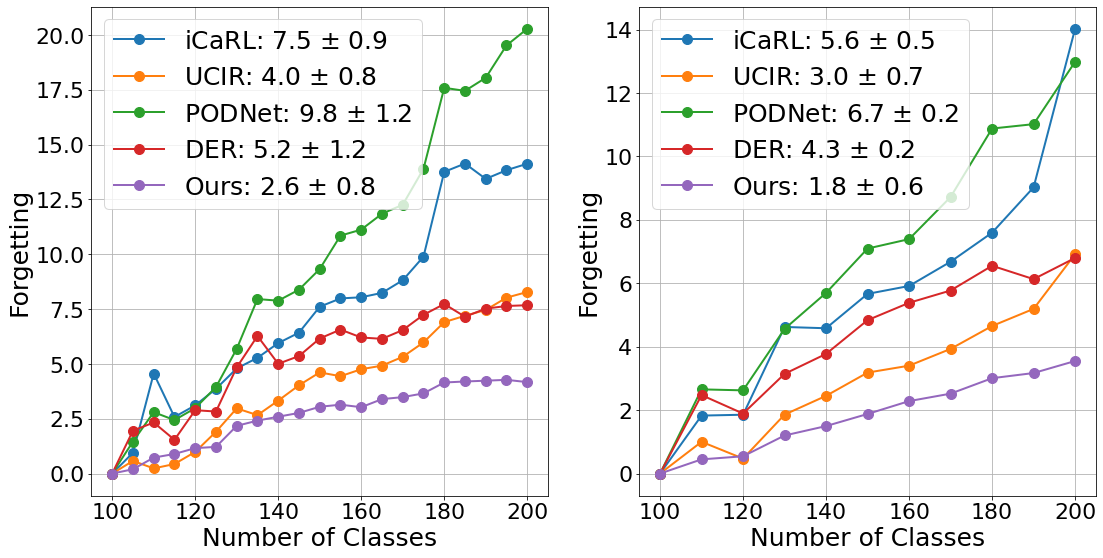

In [4]:
folder = f'results/pretrain'
exps = {
    5:
       {
        'iCaRL': f'{folder}/icarl/20220328_icarl_cub200_100steps5',
        'UCIR': f'{folder}/ucir/20220320_ucir_cnn_cub200_100steps5',
        'PODNet': f'{folder}/podnet/20220330_podnet_cnn_cub200_100steps5',
        'DER': f'{folder}/der/20220325_derE0_cub200_100steps5',
        'Ours': f'{folder}/ours/20220321_derE3_cub200_100steps5',
       },
    10:
       {
        'iCaRL': f'{folder}/icarl/20220327_icarl_cub200_100steps10',
        'UCIR': f'{folder}/ucir/20220319_ucir_cnn_cub200_100steps10',
        'PODNet': f'{folder}/podnet/20220327_podnet_cnn_cub200_100steps10',
        'DER': f'{folder}/der/20220331_derE0_cub200_100steps10',
        'Ours': f'{folder}/ours/20220319_derE3_cub200_100steps10',
       }       
      }

incs=[5,10]
row = min(len(incs),3)
plt.figure(figsize=(9*len(incs),9))
for j, inc in enumerate(incs):
    exp = exps[inc]
    step = int(100//inc)

    plt.subplot(int(np.ceil(len(incs)//row)),row,j+1)

    all_forget = {}
    avg_forget = {}
    count = {}
    for j in [0,1,2]:
        for e1, e2 in exp.items():
            file = f'{e2}/run_{j}_1993_.json'
            if not os.path.exists(file):
                continue
            result = json.load(open(file))
            
            all_forget_total = {}
            for k in range(step,step*2+1):
                if k == step:
                    start = 0
                else:
                    start = (k-1)*inc
                end = k*inc - 1

                top1_first = np.zeros(len(result['results']) - (k-step))
                for p in range(start, end+1):
                    new_key = f'{str(p).zfill(2)}-{str(p).zfill(2)}'
                    top1_first += np.array(list(map(lambda x: x['accuracy_per_class'][new_key], result['results'][(k-step):])))
                top1_first /= (end-start+1) / 100

                forgetting = np.concatenate([[0], np.maximum.accumulate(top1_first)[:-1] - top1_first[1:]])

                if e1 in all_forget_total:
                    all_forget_total[e1][k-step:] += np.array(forgetting)
                else:
                    all_forget_total[e1] = np.array(forgetting)
                    
            forgetting = all_forget_total[e1]        
            forgetting[1:] /= np.arange(len(forgetting)-1) + 1
            if e1 in all_forget:
                all_forget[e1] += forgetting
                avg_forget[e1].append(np.mean(forgetting))
                count[e1] += 1
            else:
                all_forget[e1] = forgetting
                avg_forget[e1] = [np.mean(forgetting)]
                count[e1] = 1
            
    for e1, e2 in all_forget.items():
        forgetting = all_forget[e1]/count[e1]
        print(e1, forgetting)
        mean = statistics.mean(avg_forget[e1]) if len(avg_forget[e1])>1 else avg_forget[e1][0]
        std = statistics.stdev(avg_forget[e1]) if len(avg_forget[e1])>1 else 0
        xs = list(range(100,201,inc))
        plt.plot(xs, forgetting, marker='o', label=f'{e1}: {mean:.1f}' + r' $\pm$ ' + f'{std:.1f}', linewidth=2, markersize=10)
        
    plt.xlabel('Number of Classes', fontsize=25)
    plt.xticks(fontsize=22)
    plt.ylabel('Forgetting', fontsize=25)
    plt.yticks(fontsize=22)
    plt.grid(True)
#     plt.ylim(-1,15)
#     plt.title(f'{inc} new classes per step', fontsize=25)
    plt.legend(prop={'size':25})
#     plt.tight_layout()

plt.show()


Classes with improved accuracy

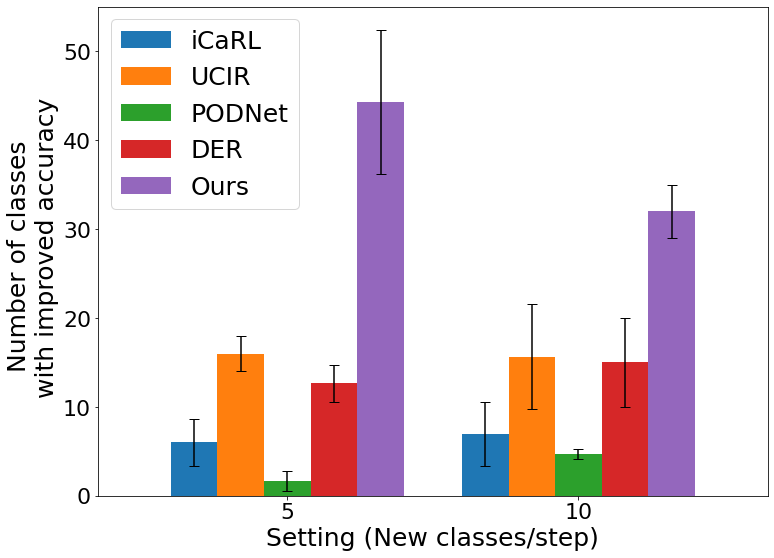

In [4]:
folder = f'results/pretrain'
exps = {
    5:
       {
        'iCaRL': f'{folder}/icarl/20220328_icarl_cub200_100steps5',
        'UCIR': f'{folder}/ucir/20220320_ucir_cnn_cub200_100steps5',
        'PODNet': f'{folder}/podnet/20220330_podnet_cnn_cub200_100steps5',
        'DER': f'{folder}/der/20220325_derE0_cub200_100steps5',
        'Ours': f'{folder}/ours/20220321_derE3_cub200_100steps5',
       },
    10:
       {
        'iCaRL': f'{folder}/icarl/20220327_icarl_cub200_100steps10',
        'UCIR': f'{folder}/ucir/20220319_ucir_cnn_cub200_100steps10',
        'PODNet': f'{folder}/podnet/20220327_podnet_cnn_cub200_100steps10',
        'DER': f'{folder}/der/20220331_derE0_cub200_100steps10',
        'Ours': f'{folder}/ours/20220319_derE3_cub200_100steps10',
       }       
      }

incs=[5,10]
names_mean = list(exps[5].keys())
names_std = list(map(lambda x: x+'_std', exps[5].keys()))
df = pd.DataFrame(columns=['Setting']+names_mean+names_std)            
for j, inc in enumerate(incs):
    exp = exps[inc]

    improved = {}
    for k in [0,1,2]:
        for e1, e2 in exp.items():
            file = f'{e2}/run_{k}_1993_.json'
            if not os.path.exists(file):
                continue
            result = json.load(open(file))

            count = 0
            for p in range(100):
                new_key = f'{str(p).zfill(2)}-{str(p).zfill(2)}'
                top1_first = np.array(list(map(lambda x: x['accuracy_per_class'][new_key], result['results'])))
                if top1_first[-1] - top1_first[0] > 0:
                    count += 1
                    
            for p in range(100,200):
                new_key = f'{str(p).zfill(2)}-{str(p).zfill(2)}'
                top1_first = np.array(list(map(lambda x: x['accuracy_per_class'][new_key], result['results'][(p//inc)-(99//inc):])))
                if top1_first[-1] - top1_first[0] > 0:
                    count += 1

            if e1 not in improved:
                improved[e1] = [count]
            else:
                improved[e1].append(count)
      
    record = {'Setting': inc}
    for i, (e1, e2) in enumerate(avg_top1_total.items()):
        mean = statistics.mean(improved[e1]) if len(improved[e1])>1 else improved[e1][0]
        std = statistics.stdev(improved[e1]) if len(improved[e1])>1 else 0
        record[f'{e1}'] = mean
        record[f'{e1}_std'] = std
        
    df = df.append(record, ignore_index=True)
    
df['Setting'] = df['Setting'].astype(int)
ax = df.plot(x="Setting", 
    y=names_mean,
    yerr=df[names_std].T.values,
    kind="bar",
#     ylim=(65,95),
    rot=0,
    figsize=(12,9), 
    capsize=5,
    linewidth=0.5, 
    width=0.8,
    fontsize=22)   

ax.set_xlabel('Setting (New classes/step)',fontdict={'fontsize':25})
ax.set_ylabel('Number of classes \n with improved accuracy',fontdict={'fontsize':25})
ax.legend(fontsize=25)    

plt.show()

Ablation study

Ours: 
  Average incremental accuracy: 82.8 ± 1.0
  Average new task accuracy: 80.8 ± 1.7
  Average first task accuracy: 82.8 ± 1.5

Without alternating loss: 
  Average incremental accuracy: 82.1 ± 1.3
  Average new task accuracy: 85.4 ± 1.0
  Average first task accuracy: 80.5 ± 2.0

Class balanced focal loss vs cross entropy loss: 
  Average incremental accuracy: 79.9 ± 1.4
  Average new task accuracy: 87.0 ± 1.2
  Average first task accuracy: 77.2 ± 2.1

Classifier vs auxiliary classifier: 
  Average incremental accuracy: 81.7 ± 0.9
  Average new task accuracy: 72.3 ± 1.1
  Average first task accuracy: 83.6 ± 1.5

Without shared feature extractor: 
  Average incremental accuracy: 82.2 ± 0.8
  Average new task accuracy: 79.5 ± 1.2
  Average first task accuracy: 82.7 ± 1.3

Without auxiliary loss: 
  Average incremental accuracy: 82.0 ± 1.1
  Average new task accuracy: 72.8 ± 1.1
  Average first task accuracy: 83.1 ± 1.6

Without distillation loss: 
  Average incremental accuracy: 81.

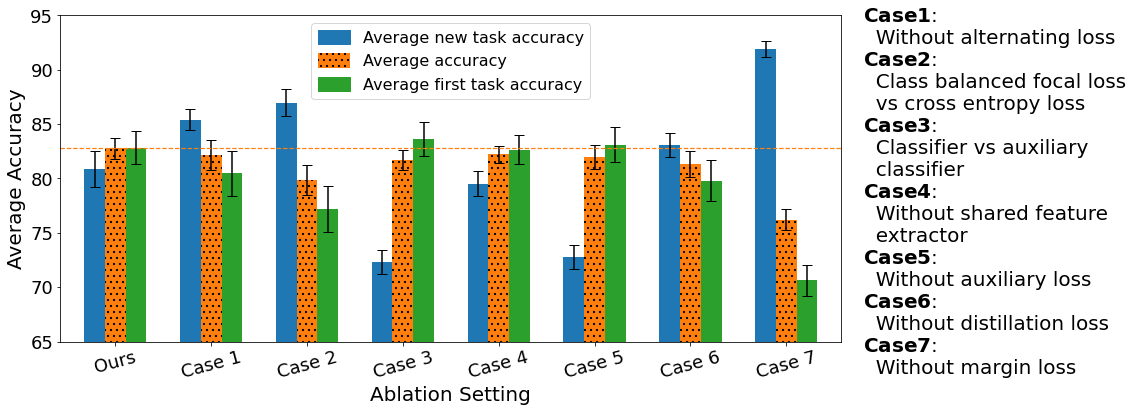

In [5]:
folder = f'results/pretrain'
exps = {
        'Ours': f'{folder}/ours/20220319_derE3_cub200_100steps10',
        'Without alternating loss': f'{folder}/ablation/20220416_derE3_cub200_100steps10_noAlt',
        'Class balanced focal loss \n  vs cross entropy loss': f'{folder}/ablation/20220504_derE3_cub200_100steps10_noFL',
        'Classifier vs auxiliary \n  classifier': f'{folder}/ablation/20220504_derE3_cub200_100steps10_AuxCls',
        'Without shared feature \n  extractor': f'{folder}/ablation/20220504_derE3_cub200_100steps10_noShare',
        'Without auxiliary loss': f'{folder}/ablation/20220415_derE3_cub200_100steps10_noAux',
        'Without distillation loss': f'{folder}/ablation/20220416_derE3_cub200_100steps10_noDis',
        'Without margin loss': f'{folder}/ablation/20220415_derE3_cub200_100steps10_noMar',
       }

inc = 10
avg_top1_total = {}
cul_top1_total = {}
avg_top1_last = {}
avg_top1_first = {}
count = {}
for k in [0,1,2]:
    for e1, e2 in exps.items():
        file = f'{e2}/run_{k}_1993_.json'
        if not os.path.exists(file):
            continue
        result = json.load(open(file))

        top1_total = list(map(lambda x: 100 * x['accuracy']['total'], result['results']))
        top1_last = [result['results'][i]['accuracy'][f'{100+(i-1)*10}-{100+i*10-1}'] * 100 for i in range(1,11)]

        top1_first = np.zeros(11)
        for p in range(0,100,10):
            new_key = f'{str(p).zfill(2)}-{str(9+p).zfill(2)}'
            top1_first += np.array(list(map(lambda x: x['accuracy'][new_key], result['results'])))
        top1_first = top1_first / 10 * 100
        
        if e1 in avg_top1_total:
            avg_top1_total[e1] += np.array(top1_total)
            cul_top1_total[e1].append(np.mean(top1_total))
            avg_top1_last[e1].append(np.mean(top1_last))
            avg_top1_first[e1].append(np.mean(top1_first))
            count[e1] += 1
        else:
            avg_top1_total[e1] = np.array(top1_total)
            cul_top1_total[e1] = [np.mean(top1_total)]
            avg_top1_last[e1] = [np.mean(top1_last)]
            avg_top1_first[e1] = [np.mean(top1_first)]  
            count[e1] = 1

df = pd.DataFrame(columns={'Case','Setting','Incremental','New task','First task','Incremental std','New task std','First task std'})            
for i, (e1, e2) in enumerate(avg_top1_total.items()):
    top1_total = e2/count[e1]
    mean = statistics.mean(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else cul_top1_total[e1][0]
    std = statistics.stdev(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else 0
    mean_last = statistics.mean(avg_top1_last[e1]) if len(avg_top1_last[e1])>1 else avg_top1_last[e1][0]
    std_last = statistics.stdev(avg_top1_last[e1]) if len(avg_top1_last[e1])>1 else 0
    mean_first = statistics.mean(avg_top1_first[e1]) if len(avg_top1_first[e1])>1 else avg_top1_first[e1][0]
    std_first = statistics.stdev(avg_top1_first[e1]) if len(avg_top1_first[e1])>1 else 0
    xs = list(range(100,201,inc))
    title = e1.replace("\n  ",  "")
    print(f'{title}: \n  Average incremental accuracy: {mean:.1f}' + u' \u00B1 ' + f'{std:.1f}')
    print(f'  Average new task accuracy: {mean_last:.1f}' + u' \u00B1 ' + f'{std_last:.1f}')
    print(f'  Average first task accuracy: {mean_first:.1f}' + u' \u00B1 ' + f'{std_first:.1f}\n')
    df = df.append({'Case':f'Case {i}' if e1!='Ours' else e1,
                    'Setting':e1,
                    'Incremental':mean,
                    'Incremental std':std,
                    'New task':mean_last,
                    'New task std':std_last,
                    'First task':mean_first, 
                    'First task std':std_first}, 
                   ignore_index=True)

import matplotlib.patches as mpatches
ax = df.plot(x="Case", 
        y=['New task','Incremental','First task'],
        yerr=df[['New task std','Incremental std','First task std']].T.values,
        kind="bar",
        ylim=(65,95),
        rot=15,
        figsize=(14,6), 
        capsize=5,
        linewidth=0.5, 
        width=0.65,
        fontsize=18)    
for bar in ax.containers[3]:
    bar.set_hatch('..')
    
ax.set_xlabel('Ablation Setting',fontdict={'fontsize':20})
ax.set_ylabel('Average Accuracy',fontdict={'fontsize':20})
ax.legend(handles=[
    mpatches.Patch(color='#1f77b4', label='Average new task accuracy'),
    mpatches.Patch(facecolor='#ff7f0e', hatch='..', label='Average accuracy'),
    mpatches.Patch(color='#2ca02c', label='Average first task accuracy'),
], handleheight=1,fontsize=16, loc='upper center')    
plt.axhline(y=statistics.mean(cul_top1_total['Ours']), color='#ff7f0e', linestyle='--', linewidth=1.2)
txtstr = ''
for i, text in enumerate(exps.keys()):
    if i == 0:
        continue
    else:
        txtstr += '$\\bf{Case ' + str(i) + '}$' + f': \n  {text}\n'
plt.text(7.8, 60, txtstr, fontsize=20)
plt.show()

### EyePACS

Incremental Accuracy

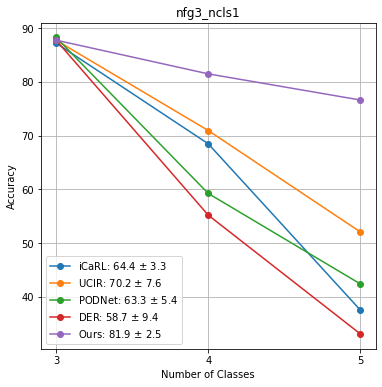

In [6]:
folder = f'results/pretrain'
exps = {
    1:
       {
        'iCaRL': f'{folder}/icarl/20220403_icarl_diabetic_3steps1',
        'UCIR': f'{folder}/ucir/20220403_ucir_diabetic_3steps1',
        'PODNet': f'{folder}/podnet/20220403_podnet_cnn_diabetic_3steps1',
        'DER': f'{folder}/der/20220404_derE0_diabetic_3steps1',
        'Ours': f'{folder}/ours/20220403_derE3_diabetic_3steps1',
       },
      }

incs=[1]
plt.figure(figsize=(6,6))

inc = 1
exp = exps[inc]

avg_top1_total = {}
cul_top1_total = {}
count = {}

for j in [0,1,2]:
    for e1, e2 in exp.items():
        file = f'{e2}/run_{j}_1993_.json'
        if not os.path.exists(file):
            continue
        result = json.load(open(file))

        top1_total = list(map(lambda x: 100 * x['accuracy']['total'], result['results']))

        if e1 in avg_top1_total:
            avg_top1_total[e1] += np.array(top1_total)
            cul_top1_total[e1].append(np.mean(top1_total))
            count[e1] += 1
        else:
            avg_top1_total[e1] = np.array(top1_total)
            cul_top1_total[e1] = [np.mean(top1_total)]
            count[e1] = 1
        
xs = list(range(3,6,inc))
for e1, e2 in avg_top1_total.items():
    top1_total = e2/count[e1]
    mean = statistics.mean(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else cul_top1_total[e1][0]
    std = statistics.stdev(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else 0
    plt.plot(xs, top1_total, marker='o', label=f'{e1}: {mean:.1f}' + r' $\pm$ ' + f'{std:.1f}')

plt.xticks(xs)    
plt.xlabel('Number of Classes')
plt.ylabel('Accuracy')
#     plt.ylim(71,89)
plt.title(f'nfg3_ncls{inc}')
plt.grid(True)
plt.legend()
plt.show()

Forgetting

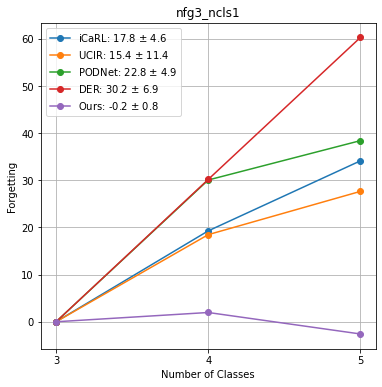

In [7]:
folder = f'results/pretrain'
exps = {
    1:
       {
        'iCaRL': f'{folder}/icarl/20220403_icarl_diabetic_3steps1',
        'UCIR': f'{folder}/ucir/20220403_ucir_diabetic_3steps1',
        'PODNet': f'{folder}/podnet/20220403_podnet_cnn_diabetic_3steps1',
        'DER': f'{folder}/der/20220404_derE0_diabetic_3steps1',
        'Ours': f'{folder}/ours/20220403_derE3_diabetic_3steps1',
       },
      }

incs=[1]
row = min(len(incs),3)
plt.figure(figsize=(6*len(incs),6))

inc = 1
exp = exps[inc]
step = int(3//inc)

all_forget = {}
avg_forget = {}
count = {}
for j in [0,1,2]:
    for e1, e2 in exp.items():
        file = f'{e2}/run_{j}_1993_.json'
        if not os.path.exists(file):
            continue
        result = json.load(open(file))

        all_forget_total = {}
        for k in range(step,step*2):
            if k == step:
                start = 0
            else:
                start = (k-1)*inc
            end = k*inc - 1

            top1_first = np.zeros(len(result['results']) - (k-step))
            for p in range(start, end+1):
                new_key = f'{str(p).zfill(2)}-{str(p).zfill(2)}'
                top1_first += np.array(list(map(lambda x: x['accuracy_per_class'][new_key], result['results'][(k-step):])))
            top1_first /= (end-start+1) / 100

            forgetting = np.concatenate([[0], np.maximum.accumulate(top1_first)[:-1] - top1_first[1:]])

            if e1 in all_forget_total:
                all_forget_total[e1][k-step:] += np.array(forgetting)
            else:
                all_forget_total[e1] = np.array(forgetting)

        forgetting = all_forget_total[e1]        
        forgetting[1:] /= np.arange(len(forgetting)-1) + 1
        if e1 in all_forget:
            all_forget[e1] += forgetting
            avg_forget[e1].append(np.mean(forgetting))
            count[e1] += 1
        else:
            all_forget[e1] = forgetting
            avg_forget[e1] = [np.mean(forgetting)]
            count[e1] = 1

for e1, e2 in all_forget.items():
    forgetting = all_forget[e1]/count[e1]
    mean = statistics.mean(avg_forget[e1]) if len(avg_forget[e1])>1 else avg_forget[e1][0]
    std = statistics.stdev(avg_forget[e1]) if len(avg_forget[e1])>1 else 0
    xs = list(range(3,6,inc))
    plt.plot(xs, forgetting, marker='o', label=f'{e1}: {mean:.1f}' + r' $\pm$ ' + f'{std:.1f}')
        
plt.xticks(xs)    
plt.xlabel('Number of Classes')
plt.ylabel('Forgetting')
#     plt.ylim(71,89)
plt.title(f'nfg3_ncls{inc}')
plt.grid(True)
plt.legend()

plt.show()


### HAM10000

Incremental Accuracy

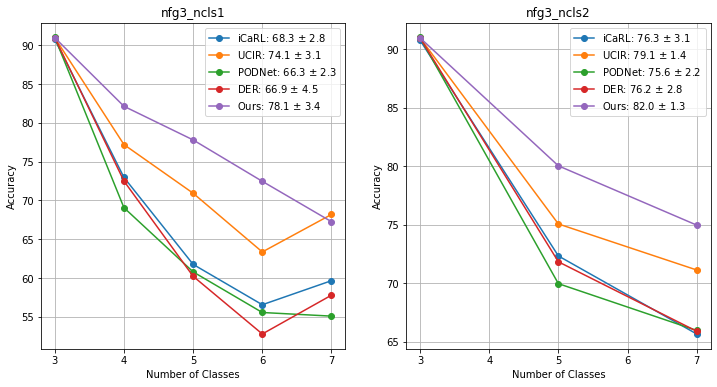

In [8]:
folder = f'results/pretrain'
exps = {
    1:
       {
        'iCaRL': f'{folder}/icarl/20220407_icarl_ham10000_3steps1',
        'UCIR': f'{folder}/ucir/20220407_ucir_ham10000_3steps1',
        'PODNet': f'{folder}/podnet/20220415_podnet_ham10000_3steps1',
        'DER': f'{folder}/der/20220415_derE0_ham10000_3steps1',
        'Ours': f'{folder}/ours/20220406_derE3_ham10000_3steps1',
       },
    2:
       {
        'iCaRL': f'{folder}/icarl/20220404_icarl_ham10000_3steps2',
        'UCIR': f'{folder}/ucir/20220404_ucir_ham10000_3steps2',
        'PODNet': f'{folder}/podnet/20220406_podnet_ham10000_3steps2',
        'DER': f'{folder}/der/20220405_derE0_ham10000_3steps2',
        'Ours': f'{folder}/ours/20220404_derE3_ham10000_3steps2',
       },
      }

incs=[1,2]
row = min(len(incs),3)
plt.figure(figsize=(6*len(incs),6))
for j, inc in enumerate(incs):
    exp = exps[inc]
    plt.subplot(int(np.ceil(len(incs)//row)),row,j+1)

    avg_top1_total = {}
    cul_top1_total = {}
    count = {}
    for k in [0,1,2]:
        for e1, e2 in exp.items():
            file = f'{e2}/run_{k}_1993_.json'
            if not os.path.exists(file):
#                 file = f'{e2}/run_{k}_199_.json'
#                 if not os.path.exists(file):
                continue
            result = json.load(open(file))

            top1_total = list(map(lambda x: 100 * x['accuracy']['total'], result['results']))
        
            if e1 in avg_top1_total:
                avg_top1_total[e1] += np.array(top1_total)
                cul_top1_total[e1].append(np.mean(top1_total))
                count[e1] += 1
            else:
                avg_top1_total[e1] = np.array(top1_total)
                cul_top1_total[e1] = [np.mean(top1_total)]
                count[e1] = 1
        
    xs = list(range(3,8,inc))
    for e1, e2 in avg_top1_total.items():
        top1_total = e2/count[e1]
        mean = statistics.mean(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else cul_top1_total[e1][0]
        std = statistics.stdev(cul_top1_total[e1]) if len(cul_top1_total[e1])>1 else 0
        plt.plot(xs, top1_total, marker='o', label=f'{e1}: {mean:.1f}' + r' $\pm$ ' + f'{std:.1f}')

    # plt.plot(xs, test)

    plt.xlabel('Number of Classes')
    plt.xticks(list(range(3,8)))
    plt.ylabel('Accuracy')
#     plt.ylim(71,89)
    plt.title(f'nfg3_ncls{inc}')
    plt.grid(True)
    plt.legend()
plt.show()

Forgetting

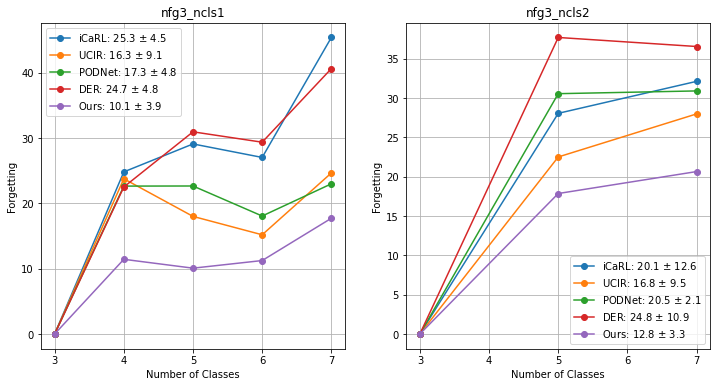

In [9]:
folder = f'results/pretrain'
exps = {
    1:
       {
        'iCaRL': f'{folder}/icarl/20220407_icarl_ham10000_3steps1',
        'UCIR': f'{folder}/ucir/20220407_ucir_ham10000_3steps1',
        'PODNet': f'{folder}/podnet/20220415_podnet_ham10000_3steps1',
        'DER': f'{folder}/der/20220415_derE0_ham10000_3steps1',
        'Ours': f'{folder}/ours/20220406_derE3_ham10000_3steps1',
       },
    2:
       {
        'iCaRL': f'{folder}/icarl/20220404_icarl_ham10000_3steps2',
        'UCIR': f'{folder}/ucir/20220404_ucir_ham10000_3steps2',
        'PODNet': f'{folder}/podnet/20220406_podnet_ham10000_3steps2',
        'DER': f'{folder}/der/20220405_derE0_ham10000_3steps2',
        'Ours': f'{folder}/ours/20220404_derE3_ham10000_3steps2',
       },
      }

incs=[1,2]
row = min(len(incs),3)
plt.figure(figsize=(6*len(incs),6))
for j, inc in enumerate(incs):
    exp = exps[inc]
    step = int(3//inc)

    plt.subplot(int(np.ceil(len(incs)//row)),row,j+1)

    all_forget = {}
    avg_forget = {}
    count = {}
    for j in [0,1,2]:
        for e1, e2 in exp.items():
            file = f'{e2}/run_{j}_1993_.json'
            if not os.path.exists(file):
                continue
            result = json.load(open(file))
            
            all_forget_total = {}
            for k in range(step,step*2+2):
                if k == step:
                    start = 0
                else:
                    start = (k-1)*inc
                end = k*inc - 1

                top1_first = np.zeros(len(result['results']) - (k-step))
                for p in range(start, end+1):
                    new_key = f'{str(p).zfill(2)}-{str(p).zfill(2)}'
                    top1_first += np.array(list(map(lambda x: x['accuracy_per_class'][new_key], result['results'][(k-step):])))
                top1_first /= (end-start+1) / 100

                forgetting = np.concatenate([[0], np.maximum.accumulate(top1_first)[:-1] - top1_first[1:]])

                if e1 in all_forget_total:
                    all_forget_total[e1][k-step:] += np.array(forgetting)
                else:
                    all_forget_total[e1] = np.array(forgetting)
                    
            forgetting = all_forget_total[e1]        
            forgetting[1:] /= np.arange(len(forgetting)-1) + 1
            if e1 in all_forget:
                all_forget[e1] += forgetting
                avg_forget[e1].append(np.mean(forgetting))
                count[e1] += 1
            else:
                all_forget[e1] = forgetting
                avg_forget[e1] = [np.mean(forgetting)]
                count[e1] = 1
            
    for e1, e2 in all_forget.items():
        forgetting = all_forget[e1]/count[e1]
        mean = statistics.mean(avg_forget[e1]) if len(avg_forget[e1])>1 else avg_forget[e1][0]
        std = statistics.stdev(avg_forget[e1]) if len(avg_forget[e1])>1 else 0
        xs = list(range(3,8,inc))
        plt.plot(xs, forgetting, marker='o', label=f'{e1}: {mean:.1f}' + r' $\pm$ ' + f'{std:.1f}')
        
    plt.xlabel('Number of Classes')
    plt.xticks(list(range(3,8)))
    plt.ylabel('Forgetting')
#     plt.ylim(71,89)
    plt.title(f'nfg3_ncls{inc}')
    plt.grid(True)
    plt.legend()

plt.show()
